# POSTGRADUATE PRICES

# 1- Create and wrangling data

## 1- Import libraries

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2- Create and export a DataFrame

In [86]:
posgrados= {

    'UNIVERSIDAD':['UNAD',
                   'CUN',
                   'UNIMINUTO'],
    'ESPECIALIZACION':['CIENCIA DE DATOS Y ANALITICA',
                       'ANALITICA DE DATOS', 
                       'BIG DATA'],
    'MODALIDAD':['VIRTUAL',
                 'VIRTUAL',
                 'PRESENCIAL'],
    'PRECIO SEMESTRAL':[4110500,5932500,8224900],
    'DESCUENTO':['SI','NO','NO'],
    'PORCENTAJE':[25,0,0],
    'CERTIFICACIONES':['SI','NO','NO'],
    'COSTO CERTIFICACIONES':['GRATIS','NO OFRECEN','NO OFRECEN'],
    'FUENTE_CONSULTA':['https://estudios.unad.edu.co/plan-de-estudios-especializacion-en-ciencia-de-datos-y-analitica', 
                       'https://cun.edu.co/posgrados/especializacion-en-analitica-de-datos',
                       'https://www.uniminuto.edu/oferta-academica/especializacion-en-big-data/especializacion-en-big-data'],
    'OBSERVACIONES':['NO APLICA','NO APLICA','NO APLICA'],

            }

data=pd.DataFrame(posgrados)
print(data)

data.to_csv('C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/outputs/analysis.csv')


  UNIVERSIDAD               ESPECIALIZACION   MODALIDAD  PRECIO SEMESTRAL  \
0        UNAD  CIENCIA DE DATOS Y ANALITICA     VIRTUAL           4110500   
1         CUN            ANALITICA DE DATOS     VIRTUAL           5932500   
2   UNIMINUTO                      BIG DATA  PRESENCIAL           8224900   

  DESCUENTO  PORCENTAJE CERTIFICACIONES COSTO CERTIFICACIONES  \
0        SI          25              SI                GRATIS   
1        NO           0              NO            NO OFRECEN   
2        NO           0              NO            NO OFRECEN   

                                     FUENTE_CONSULTA OBSERVACIONES  
0  https://estudios.unad.edu.co/plan-de-estudios-...     NO APLICA  
1  https://cun.edu.co/posgrados/especializacion-e...     NO APLICA  
2  https://www.uniminuto.edu/oferta-academica/esp...     NO APLICA  


## 3- Check DataFrame

In [87]:
data.describe()

,PRECIO SEMESTRAL,PORCENTAJE
count,3.000000e+00,3.000000
mean,6.089300e+06,8.333333
std,2.061677e+06,14.433757
min,4.110500e+06,0.000000
25%,5.021500e+06,0.000000
50%,5.932500e+06,0.000000
75%,7.078700e+06,12.500000
max,8.224900e+06,25.000000


## 4- Metod one, cheaper university with Pandas library

In [88]:
universidad_mas_barata = data.loc[data['PRECIO SEMESTRAL'].idxmin()]# se aplica los métodos .loc & .idmin, para que muestre el valor más bajo.

print("Según la predicción, la universidad más barata es:")

print(universidad_mas_barata )

Según la predicción, la universidad más barata es:
UNIVERSIDAD                                                           UNAD
ESPECIALIZACION                               CIENCIA DE DATOS Y ANALITICA
MODALIDAD                                                          VIRTUAL
PRECIO SEMESTRAL                                                   4110500
DESCUENTO                                                               SI
PORCENTAJE                                                              25
CERTIFICACIONES                                                         SI
COSTO CERTIFICACIONES                                               GRATIS
FUENTE_CONSULTA          https://estudios.unad.edu.co/plan-de-estudios-...
OBSERVACIONES                                                    NO APLICA
Name: 0, dtype: object


## 5- Metod two, cheaper university with Machine Learning libraries

In [89]:
#codificar variables categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, columns=['UNIVERSIDAD', 
                                             'ESPECIALIZACION', 
                                             'MODALIDAD', 
                                             'DESCUENTO', 
                                             'CERTIFICACIONES', 
                                             'COSTO CERTIFICACIONES'])

#separar características y variable objetivo
X = data_encoded.drop(columns=['PRECIO SEMESTRAL', 
                                'FUENTE_CONSULTA', 
                                'OBSERVACIONES'])
                                
y = data_encoded['PRECIO SEMESTRAL']

#dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#aplicación del modelo de regresión BOSQUE ALEATORIO
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predecir precios semestrales para los datos de prueba
y_pred_test = model.predict(X_test)

#proceso para obtener el índice del precio semestral más bajo en las predicciones
indice_posgrado_mas_economico = y_pred_test.argmin()

#saber la información del posgrado más económico
posgrado_mas_economico = data.iloc[indice_posgrado_mas_economico]

#se procede con la impresión y aplicación del modelo bosque aleatorio
print("El posgrado más económico, aplicando el modelo de Machine Learning es:")
print(posgrado_mas_economico)

El posgrado más económico, aplicando el modelo de Machine Learning es:
UNIVERSIDAD                                                           UNAD
ESPECIALIZACION                               CIENCIA DE DATOS Y ANALITICA
MODALIDAD                                                          VIRTUAL
PRECIO SEMESTRAL                                                   4110500
DESCUENTO                                                               SI
PORCENTAJE                                                              25
CERTIFICACIONES                                                         SI
COSTO CERTIFICACIONES                                               GRATIS
FUENTE_CONSULTA          https://estudios.unad.edu.co/plan-de-estudios-...
OBSERVACIONES                                                    NO APLICA
Name: 0, dtype: object


# 2 - Visualizations

## 1- Barplot with Matplotlib

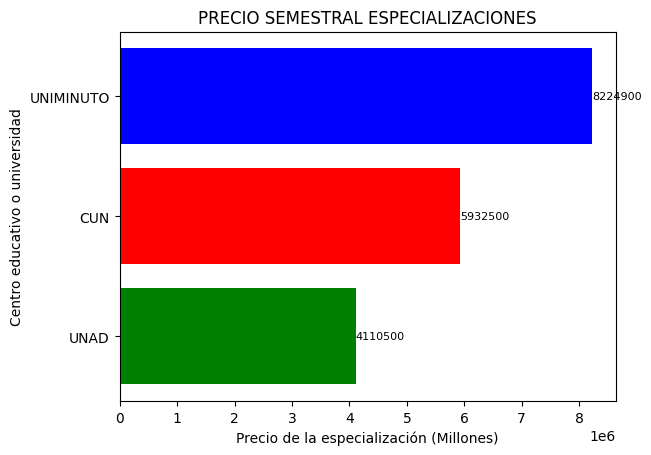

In [90]:
colors=['green','red','blue']

plt.barh( data['UNIVERSIDAD'],
          data['PRECIO SEMESTRAL'],color=colors)

for index, value in enumerate(data['PRECIO SEMESTRAL']):
    plt.text(value, index, str(value), ha='left', 
             va='center', fontsize=8)# aplicar metodo para añadir etiqueta al


plt.xlabel('Precio de la especialización (Millones)')
plt.ylabel('Centro educativo o universidad')
plt.title('PRECIO SEMESTRAL ESPECIALIZACIONES')
plt.savefig('C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/reports/barhplot.jpg')
plt.show()

## 2- Pairplot with Seaborn

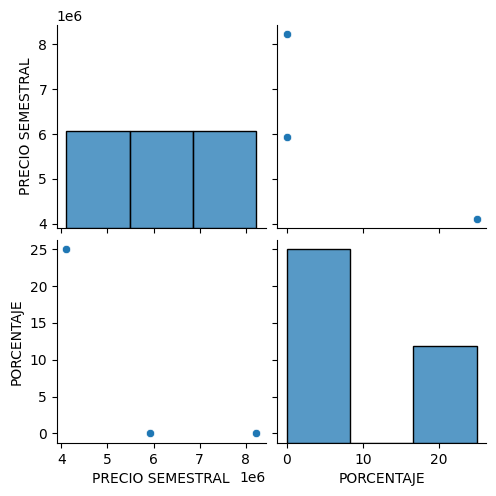

In [91]:
sns.pairplot(data)

## 3- Histogram with Seaborn

<Axes: ylabel='Count'>

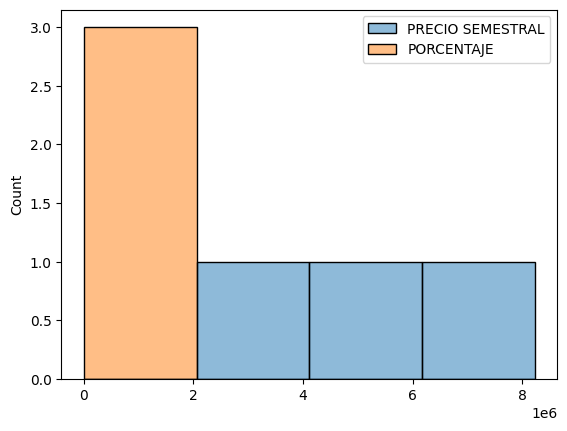

In [92]:
sns.histplot(data)

## 4- Barplot with Plotly

In [93]:
fig = px.bar(data, x ='UNIVERSIDAD', 
             y = 'PRECIO SEMESTRAL', 
             color='UNIVERSIDAD',
             title= 'PRECIO SEMESTRAL ESPECIALIZACIONES')

fig.update_layout(title_x=0.5)

fig.show()

fig.write_html("C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/reports/grafico_barra_posgrado.html")

## 5- Pie plot with Plotly

In [94]:

fig = px.pie(data, names='UNIVERSIDAD', 
             values='PRECIO SEMESTRAL', 
             title= 'PRECIO SEMESTRAL ESPECIALIZACIONES - (PORCENTAJES)') 
 
fig.update_layout(title_x=0.5)

fig.update_layout(legend_title_text='Universidad:')

fig.show() 

fig.write_html("C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/reports/grafico_torta_posgrado.html")

# 3- Conclusions

Análisis de la sitación:

1. UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD

- Ofrecen el programa de forma virtual.
- Es más viable estudiar en la UNAD, por que ofrece una forma economica de pagar la matrícula - (descuento y convenios)
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), tiene un Centro de Servicios donde se puede interactuar con estudiantes, docentes y personal administrativo.
- El sistema de inscripción y tramitología se ve facil, pero es tedioso en el sentido que hay tendencias a la desinformación, por eso es bueno acudir a los CEADs.
- Se nota que hay docentes muy bien preparados.
- Policías activos y en su de buen retiro, dan buenas referencias de la universidad, calidad humana de los profesores, que incluso el suscrito evidenció el día 17/02/2024.
- Hacen un analisis de los perfiles, preparación académica y trayectoria laboral de los aspirantes.
- Ofrecen lineas de profundización.
- Con posibilidad de obtener certificaciones de empresas tecnólogicas.

2. CUN

- Ofrecen el programa de forma virtual.
- La matricula se excede del presupuesto proyectado. 
- No ofrecen descuentos por convenios.
- No conestaron el teléfono para que ampliaran la información de lo que  ofertan.
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), tiene un Centro de Servicios donde se puede interactuar con estudiantes, docentes y personal administrativo.
- No ofrecen lineas de profundización.
- Sin posibilidad de obtener certificaciones de empresas tecnólogicas.

3. UNIMINUTO

- No ofrecen el programa de forma virtual, sino presencial.
- La matricula se excede del presupuesto proyectado, es la más cara dentro del análisis. 
- No ofrecen descuentos por convenios.
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), no tiene un Centro de Servicios donde se pueda interactuar con estudiantes, docentes y personal administrativo.
- No ofrecen lineas de profundización.
- Sin posibilidad de obtener certificaciones de empresas tecnólogicas.

4. DECISIÓN FINAL

- El pago de la matricula a la UNAD, representa entre todas las universidades consultadas, el 25% más barato que las otras opciones.

- Para inferir, se toma la decisión de estudiar en la Universidad Nacional Abierta y a Distancia - UNAD.
